### Colab Manual - Upload

"shift + enter" will execute the code in each cell.

Mount your drive and permit this notebook to access your Google Drive files.

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

librosa is a Python library used for audio and music analysis tools for loading, processing, and analyzing audio signals.

After importing librosa, input the path of the wav file to be uploaded into the librosa.load function and check the signal and sampling rate (sr).

In [48]:
import librosa
# wav_path = '/content/drive/MyDrive/MyDB/example.wav'
wav_path = '/home/woongjib/Projects/BESSL__/outputs/Alice_gt.wav'
signal, sr = librosa.load(path=wav_path, sr=None)

In [5]:
print(f"sampling rate: {sr} [Hz]")
print(f"length(signal) in samples: {len(signal)}")
print(f"length(signal) in seconds: {len(signal)/sr:.2f}")

sampling rate: 48000 [Hz]
length(signal) in samples: 674408
length(signal) in seconds: 14.05


### Plotting tutorial

NumPy: A fundamental Python library for numerical computing. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays efficiently.  

Matplotlib: A popular plotting library in Python used for creating static, interactive, and animated visualizations. It's widely used for generating graphs, plots, and charts.

Import the libraries (packeges) that we will use.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

## Plot the example wav.

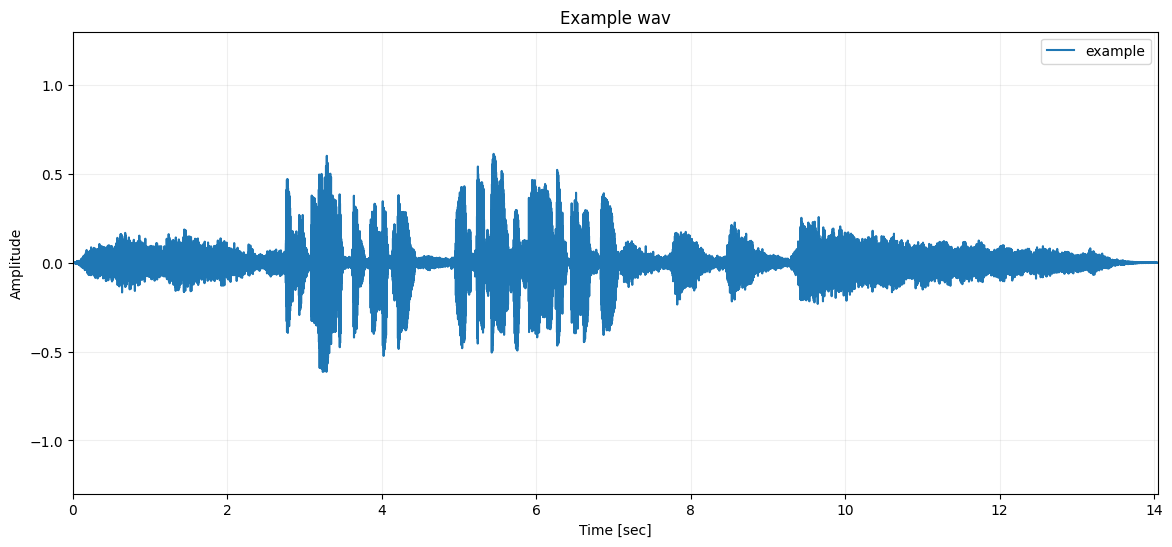

In [7]:
end = len(signal)/sr # in seconds (signal duration)
start = 0 # in seconds
# t: The time array obtained by sampling the [start, end] interval (in seconds) at a sampling rate of sr.
t = np.linspace(start, end, num=len(signal))

plt.figure(figsize=(14, 6))  # Set the figure size
plt.plot(t, signal, label='example')
plt.xlim([t[0], t[-1]])
plt.ylim([-1.3, 1.3])
plt.grid(alpha=0.2)
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')
plt.title('Example wav')
plt.legend()
plt.show()

Spectrogram (Short-Time Fourier Transform)

In [8]:
# import scipy

# def my_stft(input, n_fft=None, hop_len=None, win_len=None, win_type='hamming',
#                center=True, pad_mode='reflect', normalized=False, onesided=True, return_complex=True):
#     if hop_len is None:
#         hop_len = n_fft // 4
#     if win_len is None:
#         win_len = n_fft
#     # https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.get_window.html
#     window = scipy.signal.get_window(win_type, win_len)

#     if n_fft is None:
#         n_fft = 2**np.ceil(np.log2(len(window))).astype(int)
#     else:
#         if not np.log2(n_fft).is_integer():
#           raise ValueError(f"FFT points ({n_fft}) must be a power of 2.")
#         if n_fft < len(window):
#           new_n_fft = 2**np.ceil(np.log2(len(window))).astype(int)
#           raise ValueError(f"FFT points ({n_fft}) must be greater than or equal to the window length ({len(window)}). The recommended fft points is {new_n_fft} points.")

#     if len(window) < n_fft:
#         window = np.pad(window, (0, n_fft - len(window)), mode='constant')

#     if center:
#         pad = n_fft // 2
#         input = np.pad(input, pad_width=(pad, pad), mode=pad_mode)

#     n_frames = 1 + (len(input) - n_fft) // hop_len
#     stft = np.empty((n_fft if not onesided else n_fft // 2 + 1, n_frames), dtype=np.complex128)

#     for i in range(n_frames):
#         start = i * hop_len
#         end = start + n_fft
#         frame = input[start:end] * window
#         frame_fft = np.fft.fft(frame, n=n_fft)
#         if onesided:
#             frame_fft = frame_fft[:n_fft // 2 + 1]
#         if normalized:
#             frame_fft /= np.sqrt(np.sum(window ** 2))
#         stft[:, i] = frame_fft

#     if return_complex is None:
#       '''
#       output format: Complex-valued array
#       shape: (frequencies, n_frames); frequencies = (n_fft // 2 + 1)
#       '''
#       return_complex = np.iscomplexobj(input)

#     if not return_complex:
#       '''
#       output format: Real and imaginary components
#       shape: (frequencies, n_frames, 2); frequencies = (n_fft // 2 + 1)
#       '''
#       stft = np.stack([stft.real, stft.imag], axis=-1)

#     return stft

In [46]:
import torch

n_fft = 1024 # 1024-point FFT
hop_len= int(0.01*sr) # 10 ms in samples
win_len= int(0.02*sr) # 20 ms in samples
win_type='hamming'

stft = librosa.stft(signal, n_fft=n_fft,  hop_length=hop_len, win_length=win_len, window='hamming')
print(stft.shape)

(513, 1406)


Text(0, 0.5, 'Frequency (kHz)')

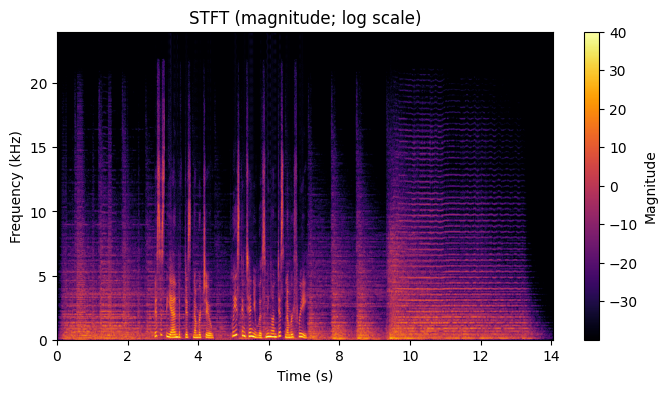

In [50]:
# Compute magnitude spectrum
mag = np.abs(stft)
log_mag = librosa.amplitude_to_db(mag)

# STFT의 시간 축을 초 단위로 변환
num_frames = mag.shape[1]
time_axis = np.arange(num_frames) * hop_len / sr

# STFT의 주파수 축을 Hz로 변환
freq_axis = np.linspace(0, sr / 2, mag.shape[0]) # in Hz
freq_axis = freq_axis/1000 # in kHz

# Plot STFT magnitude spectrogram
plt.figure(figsize=(8,4))
plt.title('STFT (magnitude; log scale)')
plt.imshow(log_mag, aspect='auto', origin='lower', cmap='inferno',
            extent=[time_axis[0], time_axis[-1], freq_axis[0], freq_axis[-1]])
plt.colorbar(label='Magnitude')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (kHz)')

Listen to the signal.

In [11]:
from IPython.display import Audio
Audio(data=signal, rate=sr)

## Example signals: Sinusodial waves

In [13]:
# Setting the figure size
width = 10  # Width of the figure in inches
height = 5  # Height of the figure in inches
plt.rcParams["figure.figsize"]=(width, height)

Sinusoidal function

In [14]:
def sinusoidal(start, end, sr, amp, freq, phase):
    """
    Generate a signal using the given amplitude, frequency, and phase values.

    Parameters:
    start (float): Start of the time range (in seconds).
    end (float): End of the time range (in seconds).
    sr; sampling_rate (int): Sampling rate in Hz (number of samples per second).
    amp; amplitude (float): Amplitude of the signal.
    freq; frequency (float): Frequency of the signal (in Hz).
    phase (float): Phase of the signal (in radians).

    Returns:
    x (numpy array): Time values.
    y (numpy array): Signal values.
    """
    step = 1 / sr  # Step size, which is the time interval between each sample (sampling interval)
    x = np.arange(start, end, step)  # Time values from start to end with the given sampling interval (in seconds)

    # Generate the signal y using the input amplitude, frequency, and phase
    y = amp * np.cos(2 * np.pi * freq * x + phase)

    return x, y

In [16]:
'''
x = np.arange(-1*np.pi, 1*np.pi, 0.01) # start, stop, step

y_0 = 1
y_1 = (1/2) * np.cos(2 * np.pi * x)
y_2 = np.cos(4 * np.pi * x)
y_3 = (2/3) * np.cos(6 * np.pi * x)
'''

start = -1*np.pi
end = 1*np.pi
sampling_rate = 100 # in Hz
phase = 0 # in radians

x, y_0 = sinusoidal(start=start, end=end, sr=sampling_rate, amp=1, freq=0, phase=0)
_, y_1 = sinusoidal(start=start, end=end, sr=sampling_rate, amp=1/2, freq=1, phase=0)
_, y_2 = sinusoidal(start=start, end=end, sr=sampling_rate, amp=1, freq=2, phase=0)
_, y_3 = sinusoidal(start=start, end=end, sr=sampling_rate, amp=2/3, freq=3, phase=0)

Plot Y_0

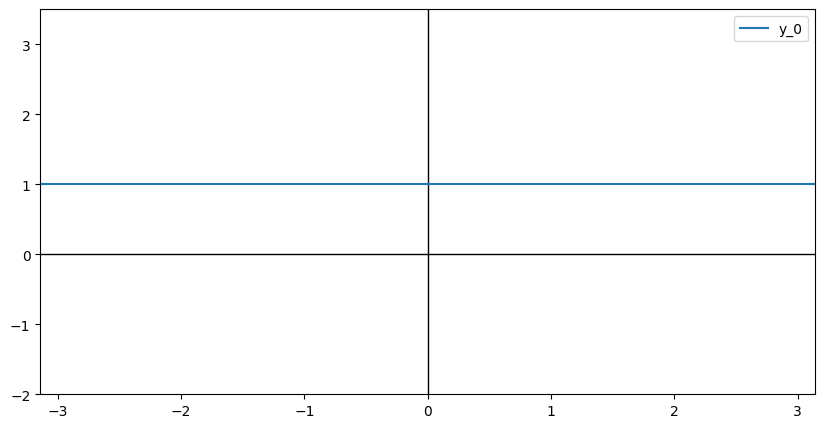

In [17]:
plt.axvline(x=0, color='k', linewidth=1)  # Draw x = 0 axis
plt.axhline(y=0, color='k', linewidth=1)   # Draw y = 0 axis

plt.axhline(y=1, label='y_0') # Plot the function

plt.legend() # Show the label of the function
plt.xlim(-np.pi, np.pi) # Limit the x axis range
plt.ylim(-2, 3.5) # Limit the y axis range
plt.show() # Plot!

Plot Y_1

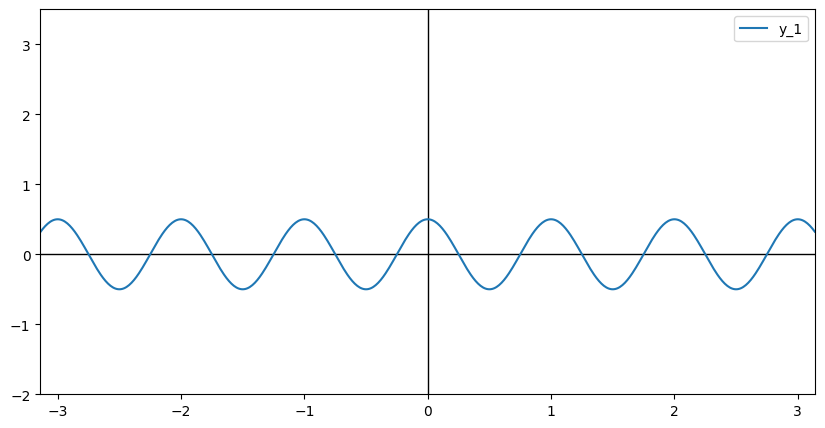

In [18]:
plt.axvline(x=0, color='k', linewidth=1)  # Draw x = 0 axes
plt.axhline(y=0, color='k', linewidth=1)   # Draw y = 0 axes

plt.plot(x, y_1, label='y_1') # Plot the function

plt.legend() # Show the label of the function
plt.xlim(-np.pi, np.pi) # Limit the x axis range
plt.ylim(-2, 3.5) # Limit the y axis range
plt.show() # Plot!

Plot Y_0 + Y_1

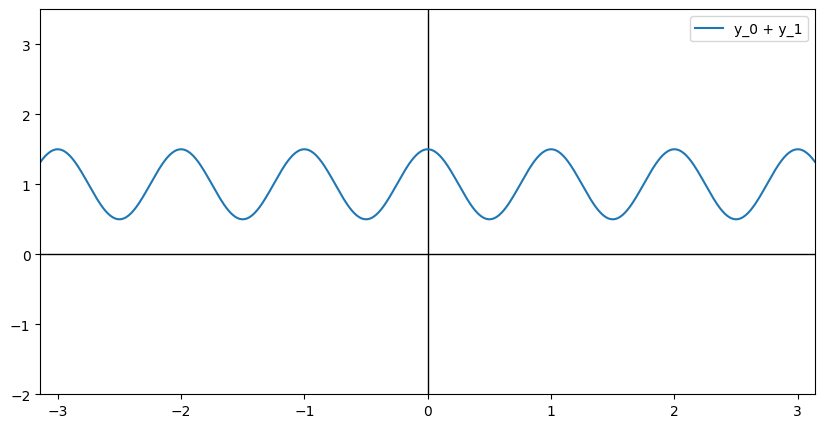

In [19]:
plt.axvline(x=0, color='k', linewidth=1)  # Draw x = 0 axes
plt.axhline(y=0, color='k', linewidth=1)   # Draw y = 0 axes

plt.plot(x, y_0 + y_1, label='y_0 + y_1') # Plot the function

plt.legend() # Show the label of the function
plt.xlim(-np.pi, np.pi) # Limit the x axis range
plt.ylim(-2, 3.5) # Limit the y axis range
plt.show() # Plot!

Plot Y_2

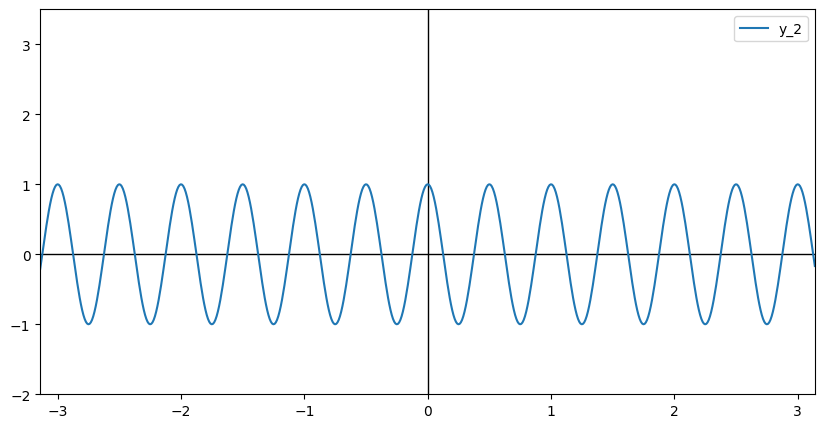

In [20]:
plt.axvline(x=0, color='k', linewidth=1)  # Draw x = 0 axes
plt.axhline(y=0, color='k', linewidth=1)   # Draw y = 0 axes

plt.plot(x, y_2, label='y_2') # Plot the function

plt.legend() # Show the label of the function
plt.xlim(-np.pi, np.pi) # Limit the x axis range
plt.ylim(-2, 3.5) # Limit the y axis range
plt.show() # Plot!

Plot Y_0 + Y_1 + Y_2

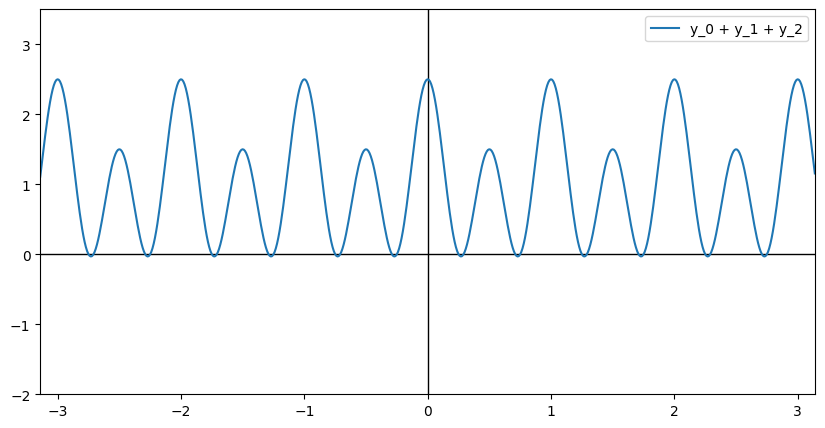

In [21]:
plt.axvline(x=0, color='k', linewidth=1)  # Draw x = 0 axes
plt.axhline(y=0, color='k', linewidth=1)   # Draw y = 0 axes

plt.plot(x, y_0 + y_1 + y_2, label='y_0 + y_1 + y_2') # Plot the function

plt.legend() # Show the label of the function
plt.xlim(-np.pi, np.pi) # Limit the x axis range
plt.ylim(-2, 3.5) # Limit the y axis range
plt.show() # Plot!

Plot Y_3

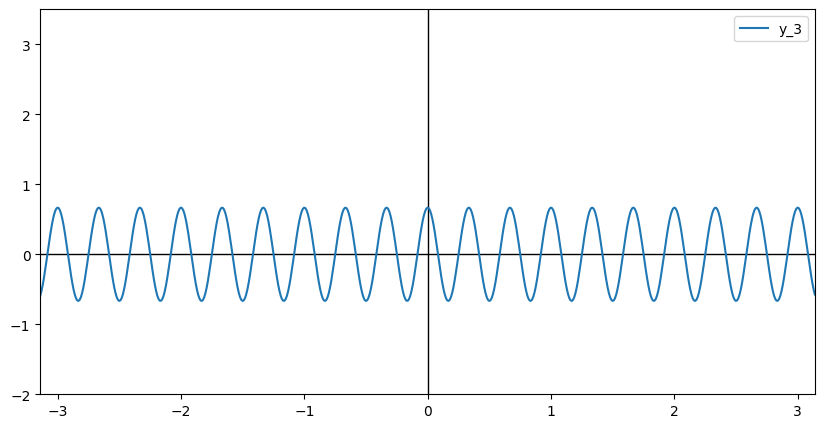

In [22]:
plt.axvline(x=0, color='k', linewidth=1)  # Draw x = 0 axes
plt.axhline(y=0, color='k', linewidth=1)   # Draw y = 0 axes

plt.plot(x, y_3, label='y_3') # Plot the function

plt.legend() # Show the label of the function
plt.xlim(-np.pi, np.pi) # Limit the x axis range
plt.ylim(-2, 3.5) # Limit the y axis range
plt.show() # Plot!

Plot Y_0 + Y_1 + Y_2 + Y_3

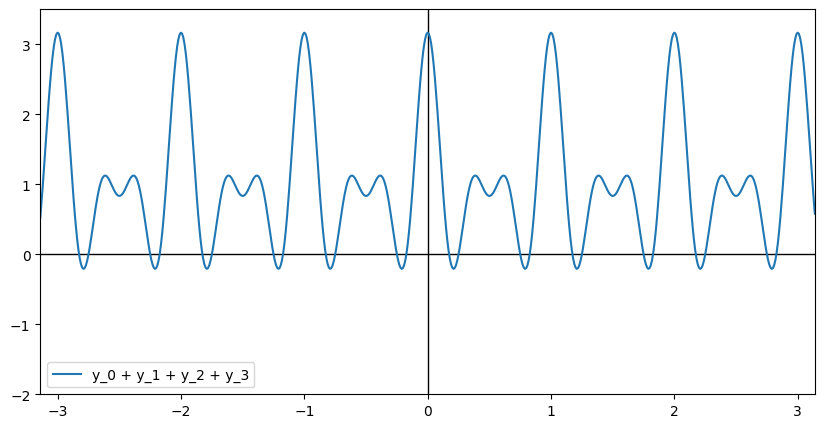

In [23]:
plt.axvline(x=0, color='k', linewidth=1)  # Draw x = 0 axes
plt.axhline(y=0, color='k', linewidth=1)   # Draw y = 0 axes

plt.plot(x, y_0 + y_1 + y_2 + y_3, label='y_0 + y_1 + y_2 + y_3') # Plot the function

plt.legend() # Show the label of the function
plt.xlim(-np.pi, np.pi) # Limit the x axis range
plt.ylim(-2, 3.5) # Limit the y axis range
plt.show() # Plot!